<a href="https://colab.research.google.com/github/mfthrq/apple-product-analysis/blob/master/eda_apple_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('sample_data/apple_product.csv')

In [88]:
data.head()

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [89]:
data.shape

(448, 8)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pid           448 non-null    int64 
 1   model         448 non-null    object
 2   price         448 non-null    object
 3   country_code  448 non-null    object
 4   country       448 non-null    object
 5   region        448 non-null    object
 6   income group  448 non-null    object
 7   scraped_date  448 non-null    object
dtypes: int64(1), object(7)
memory usage: 28.1+ KB


In [91]:
data.isnull().sum()

pid             0
model           0
price           0
country_code    0
country         0
region          0
income group    0
scraped_date    0
dtype: int64

In [92]:
data.head()

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [93]:
data['model'].value_counts()

MacBook Air                    26
iPhone 12                      26
iPhone SE                      26
AirPods Pro                    26
Apple TV 4K                    26
                               ..
Sportszíj                       1
AirPods(3. generáció)           1
24 tuuman iMac²                 1
Apple Pencil (2. sukupolvi)     1
24 inç iMac²                    1
Name: model, Length: 109, dtype: int64

In [109]:
macbook = data[data['model'].str.contains('MacBook')]
macbook_counts = macbook['income group'].value_counts()
macbook_counts

High income            19
Upper middle income     5
Lower middle income     2
Name: income group, dtype: int64

In [110]:
iphone = data[data['model'].str.contains('iPhone')]
iphone_counts = iphone['income group'].value_counts()
iphone_counts

High income            57
Upper middle income    15
Lower middle income     6
Name: income group, dtype: int64

In [112]:
airpods = data[data['model'].str.contains('AirPods')]
airpods_counts = airpods['income group'].value_counts()
airpods_counts

High income            66
Upper middle income    15
Lower middle income     7
Name: income group, dtype: int64

<ipython-input-128-7b063b5bbb11>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(macbook_counts.index, rotation=45, ha='right')
<ipython-input-128-7b063b5bbb11>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(iphone_counts.index, rotation=45, ha='right')
<ipython-input-128-7b063b5bbb11>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(airpods_counts.index, rotation=45, ha='right')


Text(0.5, 1.0, 'Income Distribution in AirPods')

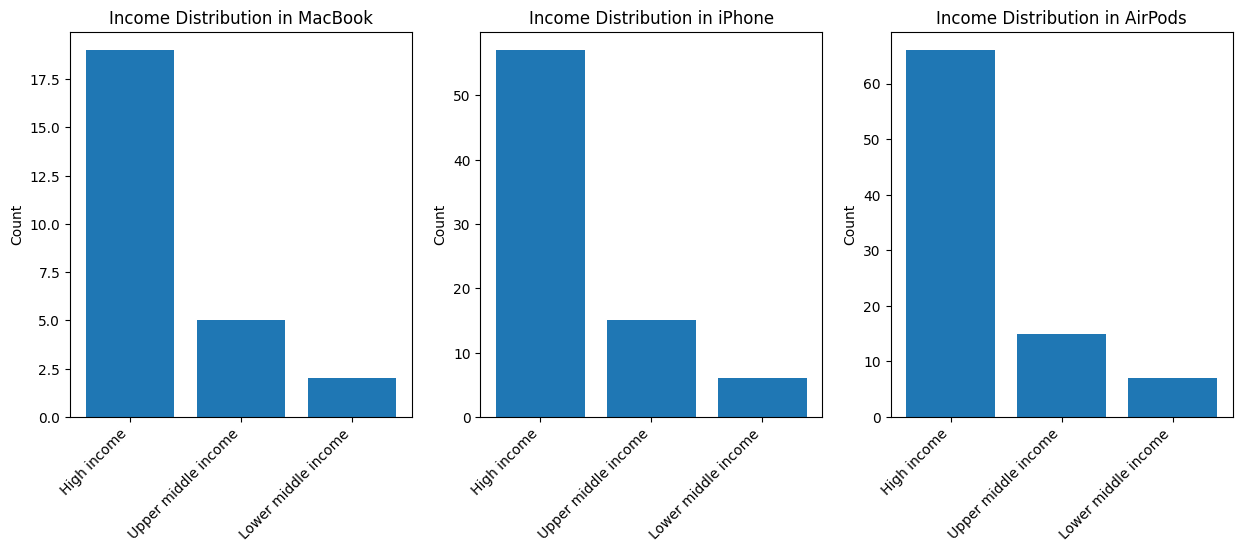

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].bar(macbook_counts.index, macbook_counts.values)
axes[0].set_xticklabels(macbook_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Income Distribution in MacBook')

axes[1].bar(iphone_counts.index, iphone_counts.values)
axes[1].set_xticklabels(iphone_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Count')
axes[1].set_title('Income Distribution in iPhone')

axes[2].bar(airpods_counts.index, airpods_counts.values)
axes[2].set_xticklabels(airpods_counts.index, rotation=45, ha='right')
axes[2].set_ylabel('Count')
axes[2].set_title('Income Distribution in AirPods')